## Installation from Pip

In [7]:
pip install coco-pano-ext-demo

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement coco-pano-ext-demo (from versions: none)
ERROR: No matching distribution found for coco-pano-ext-demo
You should consider upgrading via the '/usr/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## COCO Metrics in a bipartite graph framework

Even if the primary purpose of the COCO is to score segmentations, we use a graph framework and so we aim at scoring a bipartite graph P ↔ Q with degree 1 (1 node in P is paired with at most 1 node in Q).
The edge are weighted by shape matching metric the IoU. The figure below shows two segmentations and the corresponding bipartite graph to assess.

![](doc/matching.png)

![](doc/bipartite-5.png)

In [5]:
from coco_pano_ext_demo import COCO

P = [0.7, 0.6, 0.93, 0.8]
Q = [0, 0.6, 0.8, 0.7, 0.93]
PQ, SQ, RQ, _ = COCO(P, Q, ignore_zero=False)

print(
    f"""
    The Panoptic Quality is: {PQ}
    The Segmentation Quality is: {SQ}
    The Recognition Quality is: {RQ}
    """
    )



    The Panoptic Quality is: 0.6733333333333332
    The Segmentation Quality is: 0.7575
    The Recognition Quality is: 0.8888888888888888
    


## Ploting Precision/Recall and F-Score Curves

We first need to output the precision/recall table of the system as the IoU tolerance threshold increases. This is mostly the same code as previous but with the extra parameter `output_scores=True`.   

In [26]:
from coco_pano_ext_demo import COCO_plot

PQ, SQ, RQ, score_table = COCO(P, Q, ignore_zero=False, output_scores=True)
score_table

,IoU,Precision,Recall,F-score
0,0.60,0.8,1.00,0.888889
1,0.70,0.6,0.75,0.666667
2,0.80,0.4,0.50,0.444444
3,0.93,0.2,0.25,0.222222


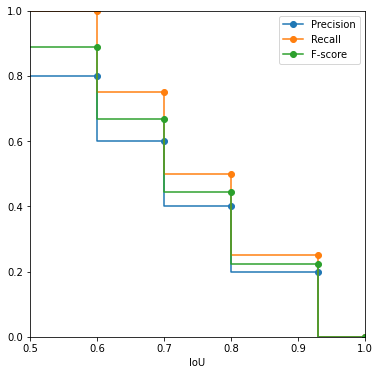

In [25]:
COCO_plot(score_table)

## COCO metrics from segmentation and labelmaps

While the evaluation framework is graph-based, the function enables assessing directly the quality of segmentations from images. You can provide either:

* 2D labelmaps: images with one label per pixel (background should have label 0 to be ignored afterward with the parameter `ignore_zero=True`
* 2D binary images: images where the 4-connected regions are in white and separated by 8-connected black boundaries

![](doc/296_5000_6500_5500_7000_gt.png) ![](doc/296_5000_6500_5500_7000_pred.png)


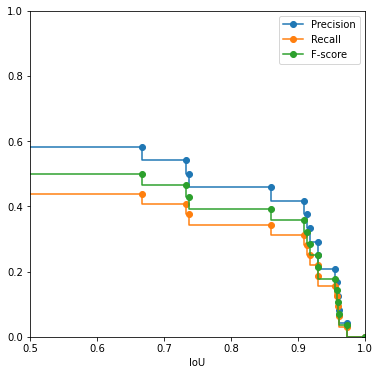

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

T = imread("doc/296_5000_6500_5500_7000_gt.png", as_gray=True)
P = imread("doc/296_5000_6500_5500_7000_pred.png", as_gray=True)


## threshold
T = np.asarray(T < 0.5)
P = np.asarray(P < 0.5)
PQ, SQ, RQ, score_table = COCO(P, T, ignore_zero=True, output_scores=True)
COCO_plot(score_table)



## Precision/Recall Maps

Precision/recall maps provide a visual insight about the performances of a system. Every non-green region in one of the map means that the region does not match correctly between the groundtruth and the prediction.

In particular, they highlight:

* the regions that have been missed (Miss) that appear in red in the *Recall map*
* the regions that have been over-segmented (False Alarm) that appear in red in the *Precision Map* 

NameError: name 'coco_pano_ext_demo' is not defined

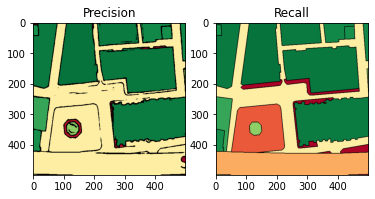

In [67]:
from skimage.io import imread
import coco_pano_ext_demo as coco

GT = imread("doc/296_5000_6500_5500_7000_gt.png", as_gray=True)
Pred = imread("doc/296_5000_6500_5500_7000_pred.png", as_gray=True)
precision, recall = coco.precision_recall_maps(GT < 0.5, Pred < 0.5)

f, [ax1, ax2] = plt.subplots(1, 2)
ax1.imshow(precision)
ax1.set_title("Precision")
ax2.imshow(recall)
ax2.set_title("Recall")
f.colorbar(coco._cmap)
